In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

raw_path = r"C:\Infosys Springboard 6.0 Internship\Datasets\FWI Dataset.csv"
df = pd.read_csv(raw_path)

print("Dataset loaded successfully.")
df.head()


Dataset loaded successfully.


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia


In [2]:
print("Info before cleaning:")
df.info()

print("\nOriginal columns:")
print(df.columns.tolist())

df.columns = df.columns.str.strip()

print("\nColumns after stripping spaces:")
print(df.columns.tolist())


Info before cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB

Original columns:
['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC',

In [3]:
print("Descriptive statistics:")
display(df.describe())

print("\nMissing values before handling:")
print(df.isnull().sum())


Descriptive statistics:


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000



Missing values before handling:
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64


In [4]:
if df['Classes'].isnull().sum() > 0:
    mode_classes = df['Classes'].mode()[0]
    df['Classes'].fillna(mode_classes, inplace=True)
    print(f"Filled missing 'Classes' with mode: {mode_classes}")

for col in ['DC', 'FWI']:
    df[col] = df[col].astype(str).str.replace(" ", "", regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nMissing values in DC & FWI after conversion:")
print(df[['DC', 'FWI']].isnull().sum())

for col in ['DC', 'FWI']:
    if df[col].isnull().sum() > 0:
        mean_val = df[col].mean()
        df[col].fillna(mean_val, inplace=True)
        print(f"Filled missing '{col}' with mean: {mean_val:.4f}")

print("\nMissing values after handling:")
print(df.isnull().sum())


Filled missing 'Classes' with mode: fire   

Missing values in DC & FWI after conversion:
DC     0
FWI    1
dtype: int64
Filled missing 'FWI' with mean: 7.0354

Missing values after handling:
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [5]:
df['Classes'] = df['Classes'].astype(str).str.strip()
df['Region'] = df['Region'].astype(str).str.strip()

print("\nUnique values in Classes:")
print(df['Classes'].value_counts())

print("\nUnique values in Region:")
print(df['Region'].value_counts())



Unique values in Classes:
Classes
fire        138
not fire    106
Name: count, dtype: int64

Unique values in Region:
Region
Bejaia            122
Sidi-Bel Abbes    122
Name: count, dtype: int64


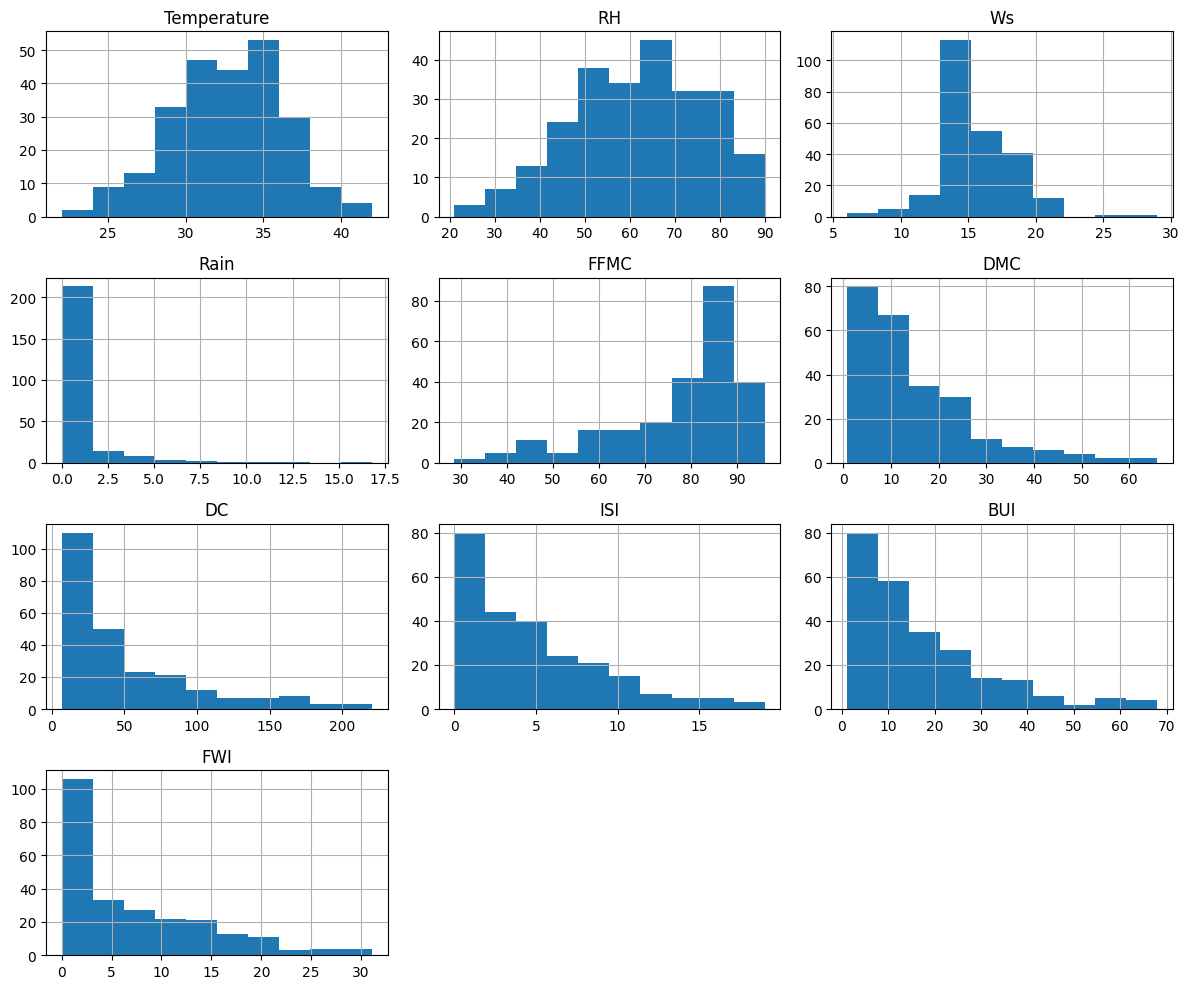

In [6]:
numeric_cols = ['Temperature', 'RH', 'Ws', 'Rain', 
                'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

df[numeric_cols].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


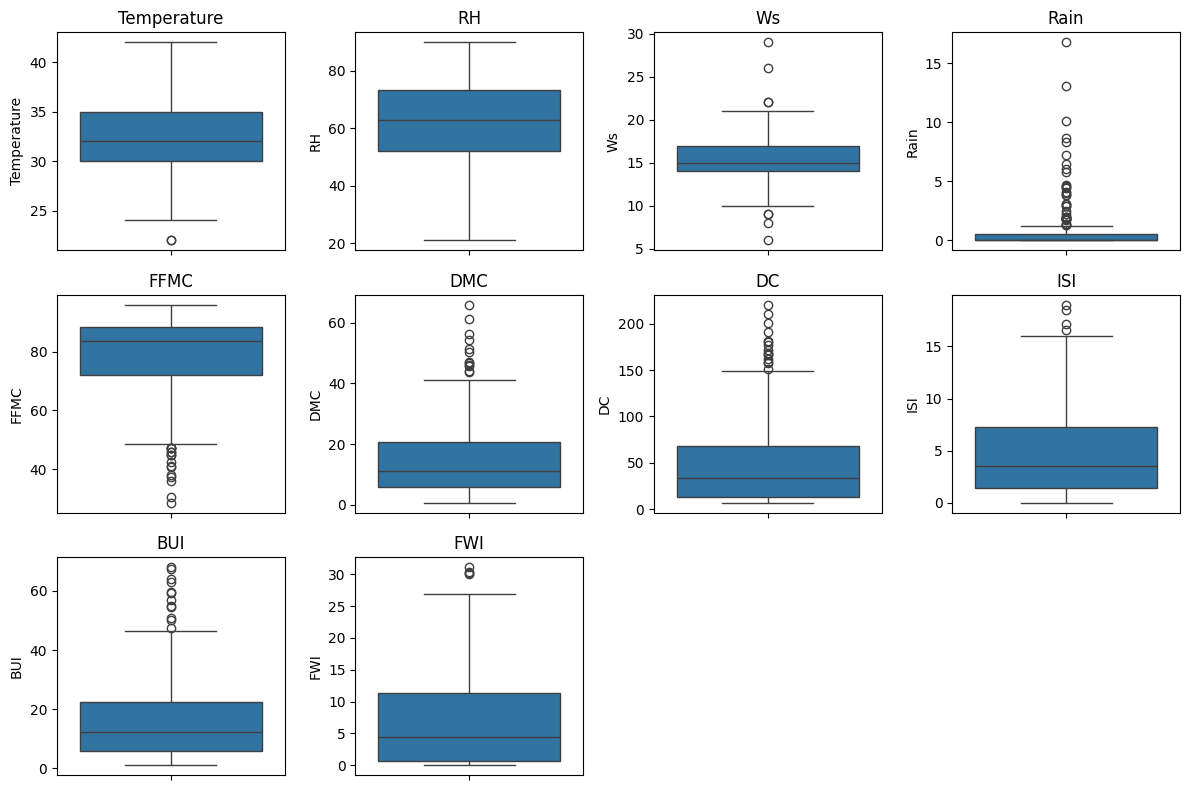

In [7]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


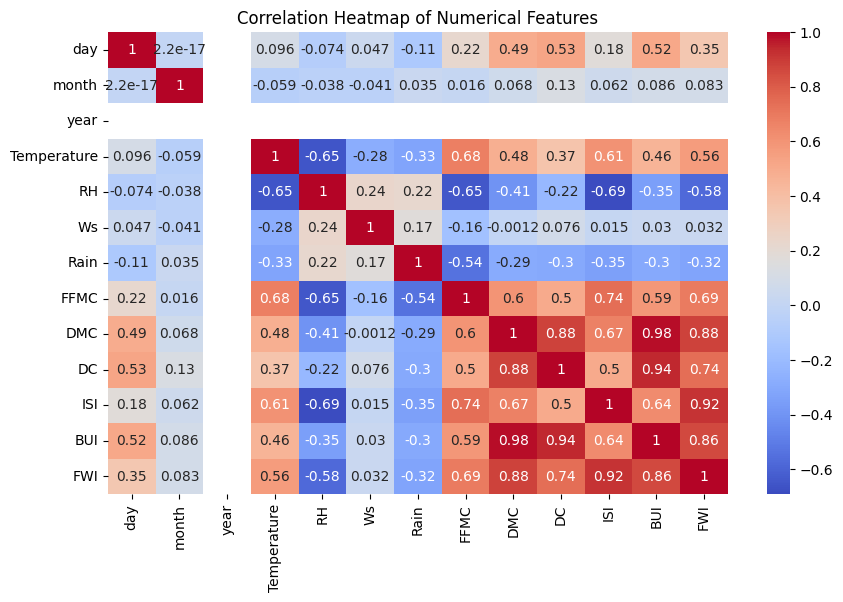

In [8]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10, 6))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


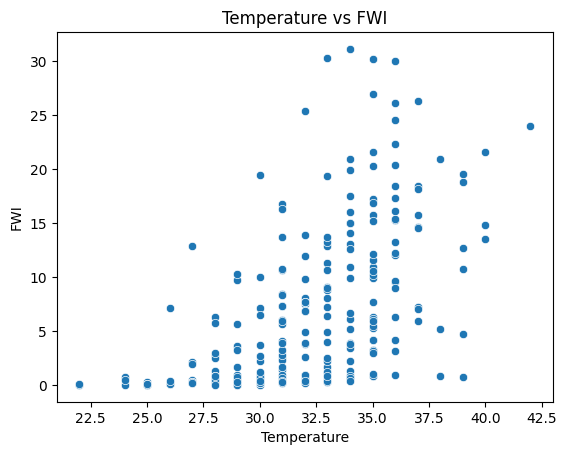

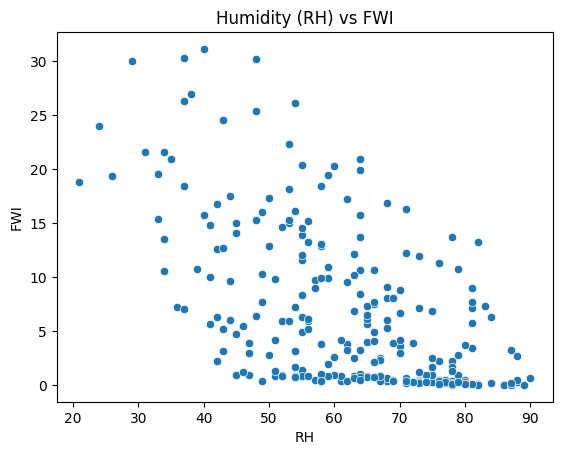

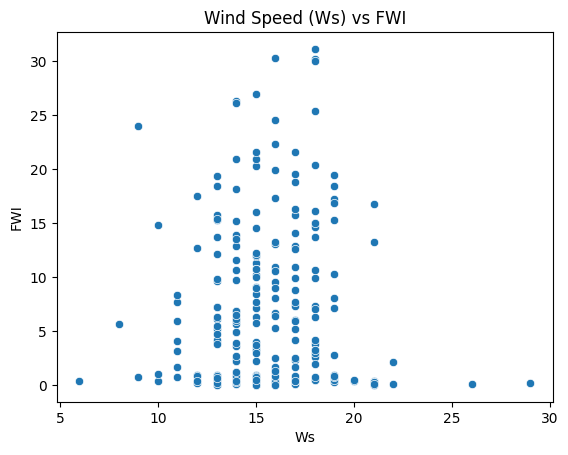

In [9]:
sns.scatterplot(data=df, x='Temperature', y='FWI')
plt.title("Temperature vs FWI")
plt.show()

sns.scatterplot(data=df, x='RH', y='FWI')
plt.title("Humidity (RH) vs FWI")
plt.show()

sns.scatterplot(data=df, x='Ws', y='FWI')
plt.title("Wind Speed (Ws) vs FWI")
plt.show()


In [10]:
region_mapping = {'Bejaia': 0, 'Sidi-Bel Abbes': 1}
df['Region'] = df['Region'].map(region_mapping)

print("Region after encoding:")
print(df['Region'].unique())

print("\nFinal dtypes after preprocessing:")
print(df.dtypes)


Region after encoding:
[0 1]

Final dtypes after preprocessing:
day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object


In [11]:
df_clean = df.drop(columns=['Classes'])

print("Columns in cleaned dataset (Classes dropped):")
print(df_clean.columns.tolist())


Columns in cleaned dataset (Classes dropped):
['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']


In [12]:
save_dir = r"C:\Infosys Springboard 6.0 Internship\Datasets"
os.makedirs(save_dir, exist_ok=True)

save_path = os.path.join(save_dir, "FWI_Cleaned.csv")
df_clean.to_csv(save_path, index=False)

print(f"Cleaned dataset saved to: {save_path}")


Cleaned dataset saved to: C:\Infosys Springboard 6.0 Internship\Datasets\FWI_Cleaned.csv


In [ ]:
#Milestone 2: Week 3-4
#Module 3&4: Feature Engineering and Scaling &  Model Training using Ridge Regression


In [7]:
import pandas as pd

clean_path = r"C:\Infosys Springboard 6.0 Internship\Datasets\FWI_Cleaned.csv"
df = pd.read_csv(clean_path)

df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [8]:
X = df.drop(columns=['FWI'])
y = df['FWI']

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (244, 13)
y shape: (244,)


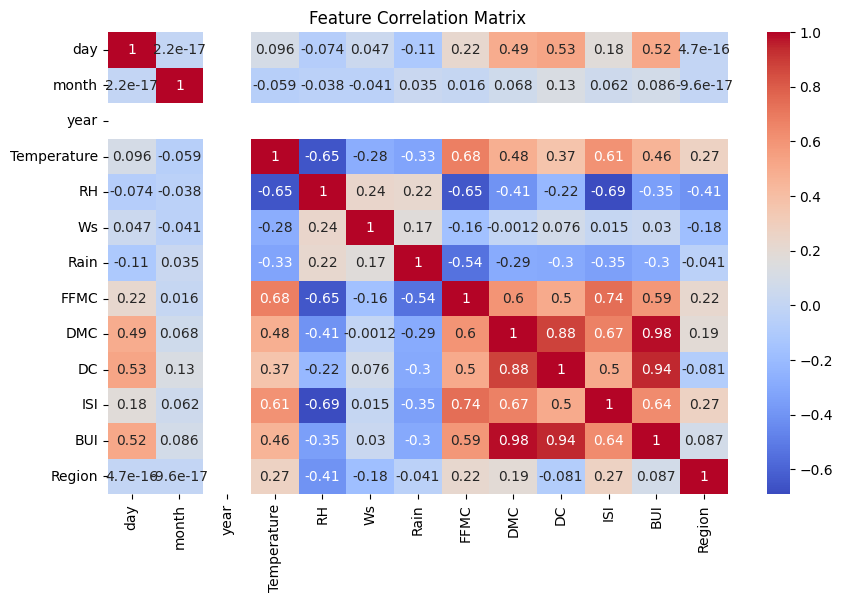

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [10]:
corr_with_target = df.corr()['FWI'].sort_values(ascending=False)
print(corr_with_target)


FWI            1.000000
ISI            0.916343
DMC            0.875827
BUI            0.857628
DC             0.738714
FFMC           0.690289
Temperature    0.564599
day            0.350752
Region         0.196696
month          0.082604
Ws             0.032315
Rain          -0.324369
RH            -0.577577
year                NaN
Name: FWI, dtype: float64


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
import pickle
import os

model_dir = r"C:\Infosys Springboard 6.0 Internship\Models"
os.makedirs(model_dir, exist_ok=True)

scaler_path = os.path.join(model_dir, "scaler.pkl")
with open(scaler_path, "wb") as f:
    pickle.dump(scaler, f)

print("Scaler saved at:", scaler_path)


Scaler saved at: C:\Infosys Springboard 6.0 Internship\Models\scaler.pkl


In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
if 'df_clean' not in globals():
    df_clean = pd.read_csv(r"C:\Infosys Springboard 6.0 Internship\Datasets\FWI_Cleaned.csv")

X = df_clean.drop(columns=['FWI'])
y = df_clean['FWI']


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
from sklearn.preprocessing import StandardScaler


with open(r"C:\Infosys Springboard 6.0 Internship\Models\scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)


,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [18]:
y_train_pred = ridge.predict(X_train_scaled)
train_r2 = r2_score(y_train, y_train_pred)


In [19]:
y_test_pred = ridge.predict(X_test_scaled)
test_r2 = r2_score(y_test, y_test_pred)


In [20]:
print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score : {test_r2:.4f}")


Train R² Score: 0.9680
Test R² Score : 0.9884


In [21]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(
    Ridge(),
    param_grid,
    cv=5,
    scoring='r2'
)

grid.fit(X_train_scaled, y_train)


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Ridge()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'alpha': [0.01, 0.1, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'r2'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and candidate parameter indexes are also d

In [22]:
print("Best alpha:", grid.best_params_['alpha'])


Best alpha: 0.1


In [23]:
best_ridge = grid.best_estimator_


In [24]:
y_test_pred = best_ridge.predict(X_test_scaled)

print("Final Train R²:", best_ridge.score(X_train_scaled, y_train))
print("Final Test R² :", best_ridge.score(X_test_scaled, y_test))


Final Train R²: 0.9683277320655175
Final Test R² : 0.9887812027732906


In [25]:
model_path = r"C:\Infosys Springboard 6.0 Internship\Models\ridge.pkl"

with open(model_path, "wb") as f:
    pickle.dump(best_ridge, f)

print(f"Ridge model saved at: {model_path}")


Ridge model saved at: C:\Infosys Springboard 6.0 Internship\Models\ridge.pkl


In [ ]:
##Milestone 3: Week 5-6
##Module 5: Evaluation and Optimization

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [28]:
y_test_pred = best_ridge.predict(X_test_scaled)


In [29]:
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("Model Evaluation on Test Data")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score (Test): {r2_test:.4f}")


Model Evaluation on Test Data
Mean Absolute Error (MAE): 0.5075
Root Mean Squared Error (RMSE): 0.6613
R² Score (Test): 0.9888


In [30]:
train_r2 = best_ridge.score(X_train_scaled, y_train)

print("\nTrain vs Test Performance")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Testing  R² Score: {r2_test:.4f}")



Train vs Test Performance
Training R² Score: 0.9683
Testing  R² Score: 0.9888


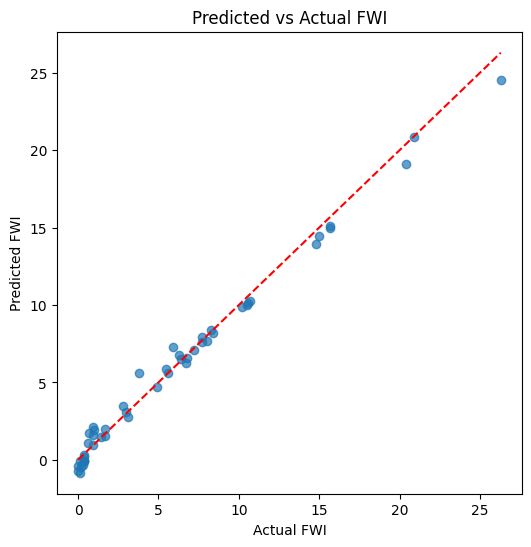

In [31]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red',
    linestyle='--'
)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Predicted vs Actual FWI")
plt.show()


In [33]:
grid = GridSearchCV(Ridge(), {'alpha':[0.01,0.1,1,10,100]}, cv=5, scoring='r2')
grid.fit(X_train_scaled, y_train)

print("Best alpha:", grid.best_params_['alpha'])
best_ridge = grid.best_estimator_


Best alpha: 0.1
